# **Biopython**

03/06/2021 - Aula 4

# **Capítulo 5 - Input/Output de sequências**
### **Tópicos abordados:** 

5.4: Sequence files as dictionaries

5.5: Writing sequence files

5.6: Low level FASTA and FASTQ parsers


Iremos discutir um pouco mais afundo o **módulo Bio.SeqIO**. O objetivo desse módulo é fornecer uma interface simples para trabalhar com diversos formatos de arquivo de sequência de maneira uniforme. Mas **ATENÇÃO**: esse módulo lida apenas com sequências que são **objetos SeqRecord** (o qual contém objetos Seq).

Link do tutorial utilizado: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf

**Instalar a biblioteca Biopython e importar o módulo SeqIO:**

In [ ]:
!pip install biopython

In [ ]:
from Bio import SeqIO

#**5.4 Sequence file as dictionaries**

**Fazer download dos arquivos que serão usados nos exemplos:**

Baixar os exemplos: https://github.com/biopython/biopython/tree/master/Doc/examples

"ls_orchid.gbk"

"ls_orchid.fasta"

Para fazer o download dos exemplos:

a) clique no exemplo desejado

b) clique em Raw (lado direito da tela)

c) clique com o botão direito e "Salvar como..." para salvar o arquivo

**Relembrando...**

Vimos nos tópicos passados como iterar sobre os registros de um arquivo usando o SeqIO.parse(), que tem a vantagem de economizar muita memória (RAM). No entanto, um iterador só permite acessar os registros um por um.

Então, se você quiser acesso aleatório aos registros por meio de uma **chave**, como o id do registro, transforme o iterador em um dicionário. É o que veremos nesse tópico.

Vamos apresentar três funções relacionadas no módulo Bio.SeqIO que permitem um **dicionário** como o acesso aleatório a um arquivo de várias sequências. **Há um trade off aqui entre flexibilidade e uso de memória**. 

Resumindo:

• **SeqIO.to_dict()** é a opção **mais flexível**, mas também a que **mais exige memória** (consulte a Seção 5.4.1). Esta é basicamente uma função auxiliar para construir um dicionário Python normal com cada entrada mantida como um objeto SeqRecord na memória, permitindo que você modifique os registros.

• **SeqIO.index()** é um **meio termo útil**, agindo **"como um dicionário" somente leitura** e analisando sequências em objetos SeqRecord sob demanda (consulte a Seção 5.4.2).

• **SeqIO.index_db()** também atua **"como um dicionário" somente leitura**, mas armazena os identificadores e a localização de arquivo (file offsets) em um arquivo no disco (como um banco de dados SQLite3), o que significa que tem **requisitos de memória muito baixos** (consulte a Seção 5.4.3), mas é **um pouco mais lento**.

##*Indexação* 




**A indexação de um livro facilita na busca por termos e assuntos:**

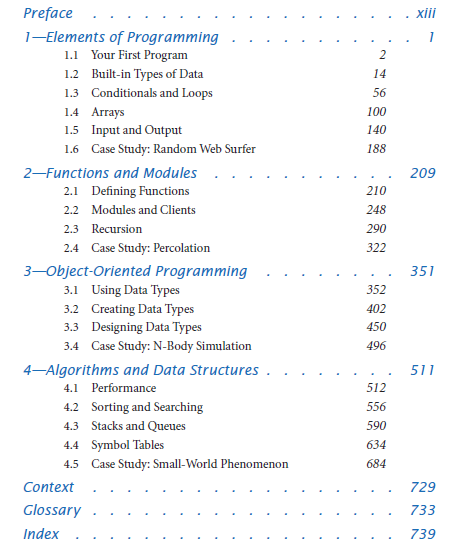

##**5.4.1 Sequence files as Dictionaries – In memory**

**Estrutura de Dicionários:**

```
dict = {chave1: valor1, 
        chave2: valor2}

```

In [ ]:
my_dict = {1: "ACGT",
           "S": "AAAA",
           (1, 10): "tupla",
           "L": ["A", "G", "T"],
           "T": (5, 50),
           "D": {"chave1": "valor1", "chave2": [1, 2, 3], "chave3": 25}
           }

In [ ]:
print(my_dict[1]) # inteiros podem ser chave
print(my_dict["S"]) # strings podem ser chave
print(my_dict[(1, 10)]) # tuplas podem ser chave
print()
print(my_dict["L"]) # lista pode ser valor
print(my_dict["T"]) # tupla pode ser valor
print(my_dict["D"]) # dicionário pode ser valor


ACGT
AAAA
tupla

['A', 'G', 'T']
(5, 50)
{'chave1': 'valor1', 'chave2': [1, 2, 3], 'chave3': 25}


A próxima coisa que faremos com nossos arquivo é mostrar como **indexá-los e acessá-los como um banco de dados usando o dicionário Python** (como um hash em Perl). Isso é muito útil para arquivos moderadamente grandes, onde você só precisa acessar certos elementos do arquivo, e contribui para um banco de dados rápido (para lidar com arquivos maiores onde a memória se torna um problema, consulte a Seção 5.4.2).

Você pode usar a função **SeqIO.to_dict()** para fazer um dicionário SeqRecord (na memória). **Por padrão, isso usará o identificador de cada registro (ou seja, o atributo .id) como a chave**:

In [ ]:
# registro genbank
orchid_dict = SeqIO.to_dict(SeqIO.parse("/content/ls_orchid.gbk.txt", "gb"))

In [ ]:
# quantidade de registros
len(orchid_dict)

94

In [ ]:
# chaves ('id' de cada registro) --> devolve um iterador das chaves
print(orchid_dict.keys())

dict_keys(['Z78533.1', 'Z78532.1', 'Z78531.1', 'Z78530.1', 'Z78529.1', 'Z78527.1', 'Z78526.1', 'Z78525.1', 'Z78524.1', 'Z78523.1', 'Z78522.1', 'Z78521.1', 'Z78520.1', 'Z78519.1', 'Z78518.1', 'Z78517.1', 'Z78516.1', 'Z78515.1', 'Z78514.1', 'Z78513.1', 'Z78512.1', 'Z78511.1', 'Z78510.1', 'Z78509.1', 'Z78508.1', 'Z78507.1', 'Z78506.1', 'Z78505.1', 'Z78504.1', 'Z78503.1', 'Z78502.1', 'Z78501.1', 'Z78500.1', 'Z78499.1', 'Z78498.1', 'Z78497.1', 'Z78496.1', 'Z78495.1', 'Z78494.1', 'Z78493.1', 'Z78492.1', 'Z78491.1', 'Z78490.1', 'Z78489.1', 'Z78488.1', 'Z78487.1', 'Z78486.1', 'Z78485.1', 'Z78484.1', 'Z78483.1', 'Z78482.1', 'Z78481.1', 'Z78480.1', 'Z78479.1', 'Z78478.1', 'Z78477.1', 'Z78476.1', 'Z78475.1', 'Z78474.1', 'Z78473.1', 'Z78472.1', 'Z78471.1', 'Z78470.1', 'Z78469.1', 'Z78468.1', 'Z78467.1', 'Z78466.1', 'Z78465.1', 'Z78464.1', 'Z78463.1', 'Z78462.1', 'Z78461.1', 'Z78460.1', 'Z78459.1', 'Z78458.1', 'Z78457.1', 'Z78456.1', 'Z78455.1', 'Z78454.1', 'Z78453.1', 'Z78452.1', 'Z78451.1', 'Z784

In [ ]:
# podemos guardar as chaves em uma lista
list(orchid_dict.keys())

Acessar cada registro de maneira individual:

In [ ]:
seq_record = orchid_dict["Z78475.1"]
print(seq_record)

ID: Z78475.1
Name: Z78475
Description: P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 5
/molecule_type=DNA
/topology=linear
/data_file_division=PLN
/date=30-NOV-2006
/accessions=['Z78475']
/sequence_version=1
/gi=2765600
/keywords=['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2']
/source=Paphiopedilum supardii
/organism=Paphiopedilum supardii
/taxonomy=['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Paphiopedilum']
/references=[Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACAT...GGT')


In [ ]:
print(seq_record.description)
print(seq_record.seq)

P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCAGTTTACTTTGGTCACCCATGGGCATCTGCTCTTGCAGTGACCTGGATTTGCCATCGAGCCTCCTTGGGAGCTTTCTTGCTGGCGATCTAAACCCGTCCCGGCGCAGTTTTGCGCCAAGTCATATGACACATAATTGGAAGGGGGTGGCATGCTGCCTTGACCCTCCCCAAATTATTTTTTTGACAACTCTCAGCAACGGATATCTCGGCTCTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNATCAGGCCAAGGGCACGCCTGCCTGGGCATTGCGAGTCATATCTCTCCCTTAATGAGGCTGTCCATACATACTGTTCAGCCAATGCGGATGTGAGTTTGGCCCCTTGTTCTTTGGTACGGGGGGTCTAAGAGCTGCATGGGCTTTTGATGGTCCAAAATACGGCAAGAGGTGGACGAACTATGCTACAACAAAATTGTTGTGCGAATGCCCCGGGTTGTCGTATTAGATGGGCCAGCATAATCTAAAGACCCTTTTGAACCCCATTGGAGGCCCATCAACCCATGATCAGTTGACGGCCATTTGGTTGCGACCCAGGTCAGGT


Então, é muito fácil criar um “banco de dados” na memória dos nossos registros GenBank. Em seguida, vamos tentar isso para o arquivo FASTA.

Observe que se você tem experiência em Python, você deve ser capaz de construir um dicionário como este “manualmente”. No entanto, os métodos típicos de construção de dicionário não lidam muito bem com o caso de chaves repetidas. **O uso de SeqIO.to_dict () verificará explicitamente as chaves duplicadas e gerará uma exceção se alguma for encontrada.**

###**5.4.1.1 Specifying the dictionary keys**

Usando o mesmo código acima, mas agora com arquivo FASTA:


In [ ]:
# registeo FASTA
orchid_dict = SeqIO.to_dict(SeqIO.parse("/content/ls_orchid.fasta.txt", "fasta"))
print(orchid_dict.keys())

dict_keys(['gi|2765658|emb|Z78533.1|CIZ78533', 'gi|2765657|emb|Z78532.1|CCZ78532', 'gi|2765656|emb|Z78531.1|CFZ78531', 'gi|2765655|emb|Z78530.1|CMZ78530', 'gi|2765654|emb|Z78529.1|CLZ78529', 'gi|2765652|emb|Z78527.1|CYZ78527', 'gi|2765651|emb|Z78526.1|CGZ78526', 'gi|2765650|emb|Z78525.1|CAZ78525', 'gi|2765649|emb|Z78524.1|CFZ78524', 'gi|2765648|emb|Z78523.1|CHZ78523', 'gi|2765647|emb|Z78522.1|CMZ78522', 'gi|2765646|emb|Z78521.1|CCZ78521', 'gi|2765645|emb|Z78520.1|CSZ78520', 'gi|2765644|emb|Z78519.1|CPZ78519', 'gi|2765643|emb|Z78518.1|CRZ78518', 'gi|2765642|emb|Z78517.1|CFZ78517', 'gi|2765641|emb|Z78516.1|CPZ78516', 'gi|2765640|emb|Z78515.1|MXZ78515', 'gi|2765639|emb|Z78514.1|PSZ78514', 'gi|2765638|emb|Z78513.1|PBZ78513', 'gi|2765637|emb|Z78512.1|PWZ78512', 'gi|2765636|emb|Z78511.1|PEZ78511', 'gi|2765635|emb|Z78510.1|PCZ78510', 'gi|2765634|emb|Z78509.1|PPZ78509', 'gi|2765633|emb|Z78508.1|PLZ78508', 'gi|2765632|emb|Z78507.1|PLZ78507', 'gi|2765631|emb|Z78506.1|PLZ78506', 'gi|2765630|emb|Z

Suponha que você prefira ter outra coisa como chave (como os números de acesso). Isso nos leva muito bem ao argumento opcional **key_function** de SeqIO.to_dict(), que permite **definir o que usar como chave de dicionário** para seus registros.

Primeiro, você deve escrever sua própria função para retornar a chave desejada (como uma string) ao receber um objeto SeqRecord. Em geral, os detalhes da função dependerão do tipo de registros de entrada com os quais você está lidando. Mas para o nosso exemplo, podemos simplesmente dividir o identificador do registro usando o caractere "pipe" (a linha vertical "|") e retornar a quarta entrada (index três):

In [ ]:
# Dado um objeto SeqRecord, retornar o número de acesso como string.
# ex: "gi|2765613|emb|Z78488.1|PTZ78488" --> "Z78488.1" 

def get_accession(record):
  partes = record.id.split("|") # split no pipe
  assert len(partes) == 5 and partes[0] == "gi" and partes[2] == "emb" # verifica a condição
  return partes[3]

# 'assert' retorna um AssertionError caso a condição não seja satisfeita

Agora podemos passar essa função para o SeqIO.to_dict() para ser usada na construção do dicionário:


In [ ]:
orchid_dict = SeqIO.to_dict(SeqIO.parse("/content/ls_orchid.fasta.txt", "fasta"), 
                            key_function=get_accession)
print(orchid_dict.keys())

dict_keys(['Z78533.1', 'Z78532.1', 'Z78531.1', 'Z78530.1', 'Z78529.1', 'Z78527.1', 'Z78526.1', 'Z78525.1', 'Z78524.1', 'Z78523.1', 'Z78522.1', 'Z78521.1', 'Z78520.1', 'Z78519.1', 'Z78518.1', 'Z78517.1', 'Z78516.1', 'Z78515.1', 'Z78514.1', 'Z78513.1', 'Z78512.1', 'Z78511.1', 'Z78510.1', 'Z78509.1', 'Z78508.1', 'Z78507.1', 'Z78506.1', 'Z78505.1', 'Z78504.1', 'Z78503.1', 'Z78502.1', 'Z78501.1', 'Z78500.1', 'Z78499.1', 'Z78498.1', 'Z78497.1', 'Z78496.1', 'Z78495.1', 'Z78494.1', 'Z78493.1', 'Z78492.1', 'Z78491.1', 'Z78490.1', 'Z78489.1', 'Z78488.1', 'Z78487.1', 'Z78486.1', 'Z78485.1', 'Z78484.1', 'Z78483.1', 'Z78482.1', 'Z78481.1', 'Z78480.1', 'Z78479.1', 'Z78478.1', 'Z78477.1', 'Z78476.1', 'Z78475.1', 'Z78474.1', 'Z78473.1', 'Z78472.1', 'Z78471.1', 'Z78470.1', 'Z78469.1', 'Z78468.1', 'Z78467.1', 'Z78466.1', 'Z78465.1', 'Z78464.1', 'Z78463.1', 'Z78462.1', 'Z78461.1', 'Z78460.1', 'Z78459.1', 'Z78458.1', 'Z78457.1', 'Z78456.1', 'Z78455.1', 'Z78454.1', 'Z78453.1', 'Z78452.1', 'Z78451.1', 'Z784

###**5.4.1.2 Indexing a dictionary using the SEGUID checksum**

*Checksum ou soma de verificação é um código usado para verificar a integridade de dados transmitidos através de um canal com ruídos ou armazenados em algum meio por algum tempo. A ideia é, por exemplo, pegar todos os bytes de um arquivo e somá-los, um a um, e obter um valor, o checksum. Depois de uma transferência, esse valor do checksum deve ser o mesmo tanto no arquivo enviado pelo remetente quanto no recebido pelo destinatário.*

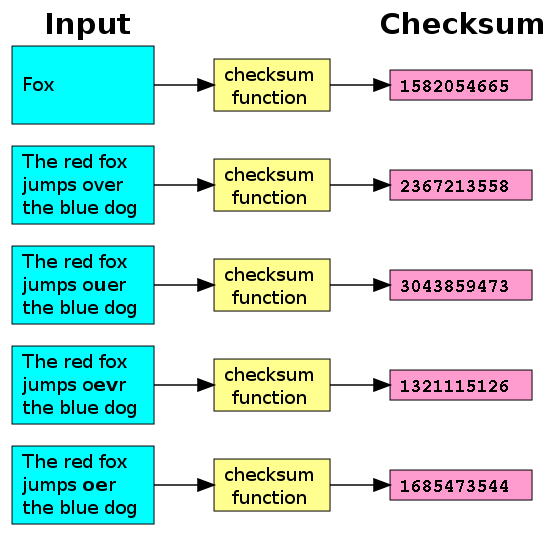

Para dar outro exemplo de trabalho com dicionários de objetos SeqRecord, usaremos a função de **soma de verificação SEGUID (SEquence Globally Unique IDentifier)**. Esta é uma soma de verificação relativamente recente e as colisões devem ser muito raras (ou seja, duas sequências diferentes com a mesma soma de verificação), uma melhoria na soma de verificação CRC64.

Para saber mais: https://biopython.org/docs/1.75/api/Bio.SeqUtils.CheckSum.html


In [ ]:
from Bio.SeqUtils.CheckSum import seguid

In [ ]:
# retorna o SEGUID (= str) da sequência ou objeto
# NÃO diferencia minúsculas de maiúsculas
print(seguid("ACGTACGTACGT"))
print(seguid("acgtACGTacgt"))

If6HIvcnRSQDVNiAoefAzySc6i4
If6HIvcnRSQDVNiAoefAzySc6i4


In [ ]:
print(type(seguid("acgtACGTacgt")))

<class 'str'>


In [ ]:
for record in SeqIO.parse("/content/ls_orchid.gbk.txt", "gb"):
  print(record.id, seguid(record.seq))

Agora, lembre-se de que o argumento **key_function** da função SeqIO.to_dict() espera uma função que transforma um SeqRecord em uma string. **Não podemos usar a função seguid() diretamente porque ela espera receber um objeto Seq (ou uma string)**. No entanto, podemos usar o recurso **lambda** do Python para criar uma função "única":

In [ ]:
seguid_dict = SeqIO.to_dict(SeqIO.parse("/content/ls_orchid.gbk.txt", "genbank"),
                            key_function=lambda rec : seguid(rec.seq))

In [ ]:
print(seguid_dict.keys())

dict_keys(['JUEoWn6DPhgZ9nAyowsgtoD9TTo', 'MN/s0q9zDoCVEEc+k/IFwCNF2pY', 'xN45pACrTnmBH8a8Y9cWSgoLrwE', 'yMhI5UUQfFOPcoJXb9B19XUyYlY', 's1Pnjq9zoSHoI/CG9jQr4GyeMZY', 'MRf6S1OYhtbdPVS845oCmLTqMgo', 'QCDzCtL6AKuc+h4UQDD6wFjz3Vs', 'Zh/FImuuDRmmM/5fXaCYAHS7wo0', 'hKw0C1fPNpi2KUM6iV0/8IadTX0', '71sZ82r6eAOBpwZs2solBr/biUs', '/8BBi+Dm0kpdHcYREmyKKbQSzKQ', 'VrTEM/VCul51xFo2OBDsZKgiFTI', '//QmLx77H51zTbd8LR+71pXY9ew', 'rb1CrF1Gbr6UDMLeRLPOWZaKIBc', '38aHi4XYVQUZkydCrxSVn2SYmCM', 'swq+/4vgyWJssxu11Lcx+2IxNC4', '+CFmEqzVnCluPe39ytjiLRL7dvU', 'ZG15PBF2qqDhj75CGTDiRAuT8Is', 'Rvx7kJnPQJKgBZzNZ5dx+CnksgY', 'IjG6hja6MS3M/CzKI9AuxFnjFxc', 'EqkQVKx2qD2+qLp/W6hwQ1GjKo8', 'cnm0fCmTFbHMlTN6t7i/ee4ydDc', 'GVd6GFv7uF0uq66u4gZB95scKFY', 'tS2JwZWXudMwdlyJBXKxjm/G1Ik', 'e85/JrwCy5T7J+zptVbhBw8govc', '+pQOTxhX/lW2fFWnZ7hmBDbLz9w', 'AUA6LlNQUBe4Vtui414zw6evNQY', 'LTPf5nwmqYaoaNYD7nqb8QZZvKM', '/EOQScJF+tmjObpwV1ujB8sUuFI', 'IA/IHU4qHwSC53tnBLuiVc/QSw4', 'BEeHOaq0TqDvtvpjOiv9BzdriuY', 'ddme0ctIDntTIfqbt+nUux6cmAE

In [ ]:
record = seguid_dict["JUEoWn6DPhgZ9nAyowsgtoD9TTo"]
print(record.id)
print(record.description)

Z78533.1
C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA


##**5.4.2 Sequence files as Dictionaries – Indexed files**


Nos tópicos anteriores, ilustramos o uso do **SeqIO.to_dict()**, que é muito flexível. **No entanto, como ele mantém tudo na memória, o tamanho do arquivo com o qual você pode trabalhar é limitado pela RAM do seu computador**.
Em geral, isso só funcionará em arquivos pequenos e médios.

Para **arquivos maiores, você deve considerar SeqIO.index()**, que funciona de maneira um pouco diferente. Embora ainda retorne um objeto semelhante a um dicionário, isso **não mantém tudo na memória**. Em vez disso, ele apenas registra onde cada registro está dentro do arquivo - quando você solicita um registro específico, ele o analisa sob demanda:

In [ ]:
orchid_dict = SeqIO.index("/content/ls_orchid.gbk.txt", "gb")
len(orchid_dict)

94

In [ ]:
type(orchid_dict)

Bio.File._IndexedSeqFileDict

In [ ]:
# para acessar um registro específico
seq_record = orchid_dict["Z78475.1"]
print(seq_record.description)
print(seq_record.seq)

P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCAGTTTACTTTGGTCACCCATGGGCATCTGCTCTTGCAGTGACCTGGATTTGCCATCGAGCCTCCTTGGGAGCTTTCTTGCTGGCGATCTAAACCCGTCCCGGCGCAGTTTTGCGCCAAGTCATATGACACATAATTGGAAGGGGGTGGCATGCTGCCTTGACCCTCCCCAAATTATTTTTTTGACAACTCTCAGCAACGGATATCTCGGCTCTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNATCAGGCCAAGGGCACGCCTGCCTGGGCATTGCGAGTCATATCTCTCCCTTAATGAGGCTGTCCATACATACTGTTCAGCCAATGCGGATGTGAGTTTGGCCCCTTGTTCTTTGGTACGGGGGGTCTAAGAGCTGCATGGGCTTTTGATGGTCCAAAATACGGCAAGAGGTGGACGAACTATGCTACAACAAAATTGTTGTGCGAATGCCCCGGGTTGTCGTATTAGATGGGCCAGCATAATCTAAAGACCCTTTTGAACCCCATTGGAGGCCCATCAACCCATGATCAGTTGACGGCCATTTGGTTGCGACCCAGGTCAGGT


In [ ]:
print(orchid_dict["Z78484.1"].format("fasta"))

>Z78484.1 P.charlesworthii 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGGGGAAGGATCATTGTTGAGATCACATAATAAT
TGATCGAGTTAATCTGGAGGATCAGTTTACTTTGGTCACCCATGGGCATTTGGCTATTGC
AGTGACCGAGAGTTTACCATCGAGCCTCCATGGGAGCTTTCTTGCTGGCGATCTAAACCC
TAGCCCGGCGCAGTTTTGGCCCAAGTCATATGACACATAATTGTGAAGGGGCGGCATGTT
TCCTACCCTCCCAACTCTCAGCAACGGATATCTCGCTCTTGCATCGATGAAGAACGCAGC
GAAATGCGATAAATGGTGTGAATTGCAGAATCCCGTGAACCATCGAGTCTTGGAACGCAA
GTTGCGCCCGAGGCCATCAGGCCAAGGGCACGCCTGCCTGGGCATTGCGAGTCATATCTC
TCCCTTAATGAGGCTGTCCATACATACTGTTCAGCCGGTGCGGATGTGAGTTTGGCCCCT
TGTTCATTGGTACGGGGGGTCTAAGAGCTGCGTGGGCTTTTGATGGTCCTAAATACGGCA
AGAGGTGGACGAACTATGCTACAACAAAACTGTTGTGCGAATGCCCCGGGTTGTCGTATT
AGATGGGCCAGCATAATCTAAAGACCCTTTGACACCCCATTGGAGGCCCATCAACCCATG
ATCAGTTGATGGTCCATTGGGTTGCGACCCCAAGTCAGGTGAAGCAACTCCCTGAGTTTT



In [ ]:
orchid_dict.close()

Você pode usar muitos outros formatos de arquivo simples, incluindo arquivos FASTA e FASTQ (consulte o exemplo na Seção 20.1.11). No entanto, formatos de alinhamento como PHYLIP ou Clustal não são suportados.


###**5.4.2.1 Specifying the dictionary keys**

Suponha que você queira usar as mesmas chaves de antes. Muito parecido com o exemplo SeqIO.to_dict() na Seção 5.4.1.1, você precisará escrever uma pequena função para mapear a partir do identificador FASTA (como uma string) para a chave que você deseja:

In [ ]:
# Dado um id SeqRecord (string), retorna o número de acesso como uma string.
# ex: "gi|2765613|emb|Z78488.1|PTZ78488" --> "Z78488.1"

def get_acc(identifier):
  partes = identifier.split("|")
  assert len(partes) == 5 and partes[0] == "gi" and partes[2] == "emb"
  return partes[3]

In [ ]:
orchid_dict = SeqIO.index("/content/ls_orchid.fasta.txt", "fasta", key_function=get_acc)

In [ ]:
print(list(orchid_dict.keys()))

['Z78533.1', 'Z78532.1', 'Z78531.1', 'Z78530.1', 'Z78529.1', 'Z78527.1', 'Z78526.1', 'Z78525.1', 'Z78524.1', 'Z78523.1', 'Z78522.1', 'Z78521.1', 'Z78520.1', 'Z78519.1', 'Z78518.1', 'Z78517.1', 'Z78516.1', 'Z78515.1', 'Z78514.1', 'Z78513.1', 'Z78512.1', 'Z78511.1', 'Z78510.1', 'Z78509.1', 'Z78508.1', 'Z78507.1', 'Z78506.1', 'Z78505.1', 'Z78504.1', 'Z78503.1', 'Z78502.1', 'Z78501.1', 'Z78500.1', 'Z78499.1', 'Z78498.1', 'Z78497.1', 'Z78496.1', 'Z78495.1', 'Z78494.1', 'Z78493.1', 'Z78492.1', 'Z78491.1', 'Z78490.1', 'Z78489.1', 'Z78488.1', 'Z78487.1', 'Z78486.1', 'Z78485.1', 'Z78484.1', 'Z78483.1', 'Z78482.1', 'Z78481.1', 'Z78480.1', 'Z78479.1', 'Z78478.1', 'Z78477.1', 'Z78476.1', 'Z78475.1', 'Z78474.1', 'Z78473.1', 'Z78472.1', 'Z78471.1', 'Z78470.1', 'Z78469.1', 'Z78468.1', 'Z78467.1', 'Z78466.1', 'Z78465.1', 'Z78464.1', 'Z78463.1', 'Z78462.1', 'Z78461.1', 'Z78460.1', 'Z78459.1', 'Z78458.1', 'Z78457.1', 'Z78456.1', 'Z78455.1', 'Z78454.1', 'Z78453.1', 'Z78452.1', 'Z78451.1', 'Z78450.1', 'Z7

In [ ]:
print(orchid_dict["Z78484.1"])

ID: gi|2765609|emb|Z78484.1|PCZ78484
Name: gi|2765609|emb|Z78484.1|PCZ78484
Description: gi|2765609|emb|Z78484.1|PCZ78484 P.charlesworthii 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 0
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGGGGAAGGATCATTGTTGAGATCACAT...TTT')


In [ ]:
print(orchid_dict["Z78484.1"].format("fasta"))

>gi|2765609|emb|Z78484.1|PCZ78484 P.charlesworthii 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGGGGAAGGATCATTGTTGAGATCACATAATAAT
TGATCGAGTTAATCTGGAGGATCAGTTTACTTTGGTCACCCATGGGCATTTGGCTATTGC
AGTGACCGAGAGTTTACCATCGAGCCTCCATGGGAGCTTTCTTGCTGGCGATCTAAACCC
TAGCCCGGCGCAGTTTTGGCCCAAGTCATATGACACATAATTGTGAAGGGGCGGCATGTT
TCCTACCCTCCCAACTCTCAGCAACGGATATCTCGCTCTTGCATCGATGAAGAACGCAGC
GAAATGCGATAAATGGTGTGAATTGCAGAATCCCGTGAACCATCGAGTCTTGGAACGCAA
GTTGCGCCCGAGGCCATCAGGCCAAGGGCACGCCTGCCTGGGCATTGCGAGTCATATCTC
TCCCTTAATGAGGCTGTCCATACATACTGTTCAGCCGGTGCGGATGTGAGTTTGGCCCCT
TGTTCATTGGTACGGGGGGTCTAAGAGCTGCGTGGGCTTTTGATGGTCCTAAATACGGCA
AGAGGTGGACGAACTATGCTACAACAAAACTGTTGTGCGAATGCCCCGGGTTGTCGTATT
AGATGGGCCAGCATAATCTAAAGACCCTTTGACACCCCATTGGAGGCCCATCAACCCATG
ATCAGTTGATGGTCCATTGGGTTGCGACCCCAAGTCAGGTGAAGCAACTCCCTGAGTTTT



In [ ]:
orchid_dict.close()

###**5.4.2.2 Getting the raw data for a record**

O objeto semelhante a um dicionário do SeqIO.index() fornece cada entrada como um objeto SeqRecord. No entanto, às vezes é útil conseguir os **dados brutos** originais diretamente do arquivo. Para isso, use o método **get_raw()** que recebe um único argumento (o identificador de registro) e retorna uma string de bytes (extraída do arquivo sem modificação).

Vamos supor que você tenha baixado todo o UniProt no formato de arquivo SwissPort de texto simples do site FTP (ftp://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.dat.gz) e descompactado como o arquivo uniprot_sprot.dat, e você deseja extrair apenas alguns registros dele:

```
uniprot = SeqIO.index("uniprot_sprot.dat", "swiss")
with open("selected.dat", "wb") as out_handle:
  for acc in ["P33487", "P19801", "P13689", "Q8JZQ5", "Q9TRC7"]:
    out_handle.write(uniprot.get_raw(acc))
```

Observe que, com o Python 3 em diante, temos que abrir o arquivo para escrita no modo binário porque o método get_raw() retorna strings de bytes.
Há um exemplo mais longo na Seção 20.1.5 usando a função SeqIO.index() para classificar um arquivo de sequência grande (sem carregar tudo na memória de uma vez).


In [ ]:
orchid_dict = SeqIO.index("/content/ls_orchid.gbk.txt", "gb")

In [ ]:
print(orchid_dict["Z78475.1"])

ID: Z78475.1
Name: Z78475
Description: P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 5
/molecule_type=DNA
/topology=linear
/data_file_division=PLN
/date=30-NOV-2006
/accessions=['Z78475']
/sequence_version=1
/gi=2765600
/keywords=['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2']
/source=Paphiopedilum supardii
/organism=Paphiopedilum supardii
/taxonomy=['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Paphiopedilum']
/references=[Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACAT...GGT')


In [ ]:
# dados brutos (raw)
raw = orchid_dict.get_raw("Z78475.1")
print(raw)
orchid_dict.close()

b'LOCUS       Z78475                   716 bp    DNA     linear   PLN 30-NOV-2006\nDEFINITION  P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA.\nACCESSION   Z78475\nVERSION     Z78475.1  GI:2765600\nKEYWORDS    5.8S ribosomal RNA; 5.8S rRNA gene; internal transcribed spacer;\n            ITS1; ITS2.\nSOURCE      Paphiopedilum supardii\n  ORGANISM  Paphiopedilum supardii\n            Eukaryota; Viridiplantae; Streptophyta; Embryophyta; Tracheophyta;\n            Spermatophyta; Magnoliophyta; Liliopsida; Asparagales; Orchidaceae;\n            Cypripedioideae; Paphiopedilum.\nREFERENCE   1\n  AUTHORS   Cox,A.V., Pridgeon,A.M., Albert,V.A. and Chase,M.W.\n  TITLE     Phylogenetics of the slipper orchids (Cypripedioideae:\n            Orchidaceae): nuclear rDNA ITS sequences\n  JOURNAL   Unpublished\nREFERENCE   2  (bases 1 to 716)\n  AUTHORS   Cox,A.V.\n  TITLE     Direct Submission\n  JOURNAL   Submitted (19-AUG-1996) Cox A.V., Royal Botanic Gardens, Kew,\n            Richmond, Surrey TW9

##**5.4.3 Sequence files as Dictionaries – Database indexed files**

Biopython 1.57 introduziu uma alternativa, **SeqIO.index_db()**, que pode funcionar até mesmo em **arquivos extremamente grandes**, uma vez que armazena as informações de registro como um arquivo em disco (usando um banco de dados SQLite3) em vez de na memória. Além disso, **você pode indexar vários arquivos juntos** (desde que todos os identificadores de registro sejam exclusivos).

A função Bio.SeqIO.index_db() recebe três argumentos obrigatórios:

• Nome do arquivo de índice, sugerimos usar algo que termine com **.idx**. Este arquivo de índice é na verdade um banco de dados SQLite3.

• Lista de nomes de arquivos de sequência para indexar (ou um único nome de arquivo)

• Formato de arquivo (string minúscula como usado no resto do módulo SeqIO).

Como exemplo, considere as versões de arquivo simples do GenBank do site FTP do NCBI, ftp://ftp.ncbi.nih.gov/genbank/, que são arquivos GenBank compactados com gzip.
Na versão 210 do GenBank, há 38 arquivos constituindo as sequências virais, gbvrl1.seq,. . . , gbvrl38.seq, ocupando cerca de 8 GB no disco depois de descompactado e contendo no total quase dois milhões de registros.
Se você estiver interessado nos vírus, poderá baixar todos os arquivos de vírus da linha de comando facilmente com o comando rsync e, em seguida, descompactá-los com gunzip:

```
!rsync -avP "ftp.ncbi.nih.gov::genbank/gbvrl*.seq.gz" .
!gunzip gbvrl*.seq.gz
```

São muitos dados para baixar apenas para este exemplo, então vamos baixar apenas os primeiros quatro blocos (cerca de 25 MB cada compactado) e descompactá-los (ocupando cerca de 1 GB de espaço):






In [ ]:
# baixar os 4 primeiros arquivos
!curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl1.seq.gz
!curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl2.seq.gz
!curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl3.seq.gz
!curl -O ftp://ftp.ncbi.nih.gov/genbank/gbvrl4.seq.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50.8M  100 50.8M    0     0  19.1M      0  0:00:02  0:00:02 --:--:-- 19.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.6M  100 58.6M    0     0  22.5M      0  0:00:02  0:00:02 --:--:-- 22.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44.6M  100 44.6M    0     0  16.5M      0  0:00:02  0:00:02 --:--:-- 16.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  101M  100  101M    0     0  27.2M      0  0:00:03  0:00:03 --:--:-- 27.2M


In [ ]:
# descompactar
!gunzip gbvrl*.seq.gz

Agora, em Python, indexe esses arquivos GenBank da seguinte maneira:

In [ ]:
import glob # * Caractere curinga (Wildcard character)

files = glob.glob("gbvrl*.seq")
print(f"{len(files)} arquivos para indexar")

4 arquivos para indexar


In [ ]:
# A indexação demora cerca de um minuto
gb_vrl = SeqIO.index_db("gbvrl.idx", files, "genbank")
print(f"{len(gb_vrl)} sequências indexadas")

453229 sequências indexadas


A indexação dos primeiros quatro arquivos demora cerca de um minuto.

No entanto, uma vez feito, repetir isso recarregará o arquivo gbvrl.idx em uma fração de segundo.
Você pode usar o índice como um dicionário Python somente leitura, sem precisar se preocupar com o arquivo de origem da sequência, por exemplo:

In [ ]:
print(gb_vrl["AB811634.1"].description)

Equine encephalosis virus NS3 gene, complete cds, isolate: Kimron1


###**5.4.3.1 Getting the raw data for a record**

Assim como com a função SeqIO.index() discutida na Seção 5.4.2.2, esse objeto semelhante a um dicionário também permite obter os bytes brutos de cada registro:

In [ ]:
print(gb_vrl.get_raw("AB811634.1"))

b'LOCUS       AB811634                 723 bp    RNA     linear   VRL 17-JUN-2015\nDEFINITION  Equine encephalosis virus NS3 gene, complete cds, isolate: Kimron1.\nACCESSION   AB811634\nVERSION     AB811634.1\nKEYWORDS    .\nSOURCE      Equine encephalosis virus\n  ORGANISM  Equine encephalosis virus\n            Viruses; Riboviria; Orthornavirae; Duplornaviricota;\n            Resentoviricetes; Reovirales; Reoviridae; Sedoreovirinae;\n            Orbivirus.\nREFERENCE   1\n  AUTHORS   Westcott,D., Mildenberg,Z., Bellaiche,M., McGowan,S.L.,\n            Grierson,S.S., Choudhury,B. and Steinbach,F.\n  TITLE     Evidence for the circulation of equine encephalosis virus in Israel\n            since 2001\n  JOURNAL   PLoS ONE 8 (8), E70532 (2013)\n   PUBMED   23950952\n  REMARK    DOI:10.1371/journal.pone.0070532\n            Erratum:[PLoS One. 2013;8(9).\n            doi:10.1371/annotation/4875ab92-466a-4f5f-b9c7-bc0e168a8f9b.\n            Wescott, David G [corrected to Westcott, David G]

##**5.4.4 Indexing compressed files**

Muito frequentemente, quando você está indexando um arquivo de sequência, ele pode ser muito grande - então, você pode querer compactá-lo no disco. Infelizmente, o acesso aleatório eficiente é difícil com os formatos de arquivo mais comuns, como gzip e bzip2. Nesta configuração, **BGZF** (Blocked GNU Zip Format) pode ser muito útil. Esta é uma variante do gzip (e pode ser descompactada usando ferramentas gzip padrão) popularizada pelo formato de arquivo BAM, samtools e tabix.

**Para criar um arquivo compactado BGZF, você pode usar a ferramenta de linha de comando bgzip que vem com samtools**.
Em nossos exemplos, usamos uma extensão de nome de arquivo *.bgz, para que possam ser diferenciados de arquivos gzip normais (chamados *.gz). Você também pode usar o módulo Bio.bgzf para ler e gravar arquivos BGZF de dentro do Python.
SeqIO.index() e SeqIO.index_db() podem ser usados com arquivos compactados BGZF.

Por exemplo, se você começou com um arquivo GenBank descompactado:

In [ ]:
orchid_dict = SeqIO.index("/content/ls_orchid.gbk.txt", "gb")
print(len(orchid_dict))
orchid_dict.close()

94


Você pode compactar isso (enquanto mantém o arquivo original) na linha de comando usando o seguinte comando:


```
bgzip -c ls_orchid.gbk > ls_orchid.gbk.bgz
```


Fazer download do arquivo compactado ls_orchid.gbk.bgz

https://github.com/biopython/biopython/tree/master/Doc/examples

Você pode usar o arquivo compactado exatamente da mesma maneira:

In [ ]:
orchid_dict = SeqIO.index("/content/ls_orchid.gbk.bgz", "gb")
print(len(orchid_dict))
orchid_dict.close()

94


In [ ]:
orchid_dict = SeqIO.index_db("/content/ls_orchid.gbk.bgz.idx", "/content/ls_orchid.gbk.bgz", "gb")
print(len(orchid_dict))
orchid_dict.close()

94


##**5.4.5 Discussion**

Então, qual desses métodos você deve usar e por quê?

Depende do que você está tentando fazer (e com quantos dados está lidando). No entanto, em geral, escolher SeqIO.index() é um bom ponto de partida. Se você estiver lidando com milhões de registros, múltiplos arquivos ou análises repetidas, então dê uma olhada em SeqIO.index_db().

Razões para escolher Bio.SeqIO.to_dict() em vez de SeqIO.index() ou SeqIO.index_db() resumem-se à necessidade de flexibilidade, apesar de suas altas necessidades de memória. 
**A vantagem de armazenar os objetos SeqRecord na memória é que eles podem ser alterados, adicionados ou removidos à vontade.** Além da desvantagem do alto consumo de memória, a indexação também pode demorar mais porque todos os registros devem ser totalmente analisados.

**SeqIO.index() e SeqIO.index_db() analisam apenas registros sob demanda**. Ao indexar, eles verificam o arquivo uma vez, procurando o início de cada registro e fazem o mínimo de trabalho possível para extrair o identificador.

Os motivos para escolher SeqIO.index() em vez de SeqIO.index_db() incluem:

• Mais rápido para construir o índice (mais perceptível em formatos de arquivo simples)

• Acesso um pouco mais rápido como objetos SeqRecord (mas a diferença só é realmente perceptível para formatos de arquivo simples de analisar).

• Pode usar qualquer objeto Python imutável como as chaves de dicionário (por exemplo, uma tupla de strings ou um conjunto congelado), não apenas strings.

• Não precisa se preocupar com o banco de dados de índice desatualizado se o arquivo de sequência que está sendo indexado mudou.

Os motivos para escolher SeqIO.index_db() em vez de SeqIO.index() incluem:

• Sem limitação de memória - isso já é importante com arquivos de sequenciamento de segunda geração, onde dezenas de milhões de sequências são comuns, e o uso de SeqIO.index() pode exigir mais de 4 GB de RAM e, portanto, uma versão de 64 bits do Python.

• Como o índice é mantido no disco, ele pode ser reutilizado. Embora a construção do arquivo de banco de dados de índice demore mais, se você tiver um script que será executado novamente nos mesmos arquivos de dados no futuro, isso pode economizar tempo a longo prazo.

• Indexação de vários arquivos juntos

• O método get_raw() pode ser muito mais rápido, pois para a maioria dos formatos de arquivo, o tamanho de cada registro é armazenado, bem como seu deslocamento.

#**5.5 Writing sequence files**

Já falamos sobre o uso de SeqIO.parse() para entrada de sequência (leitura de arquivos), e agora vamos dar uma olhada no **SeqIO.write()** que é para **saída de sequência** (gravação de arquivos). 

Esta é uma função que recebe **três argumentos**:

1) alguns objetos SeqRecord (lista ou um iterador)

2) um identificador (handle) ou nome de arquivo para gravar 

3) formato da sequência

Aqui está um exemplo onde começamos criando alguns objetos SeqRecord da maneira mais difícil (manualmente, em vez de carregá-los de um arquivo):

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [ ]:
rec1 = SeqRecord(Seq(
    "MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD"
    "GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK"
    "NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM"
    "SSAC"),
    id="gi|14150838|gb|AAK54648.1|AF376133_1",
    description="chalcone synthase [Cucumis sativus]")

rec2 = SeqRecord(Seq(
    "YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ"
    "DMVVVEIPKLGKEAAVKAIKEWGQ"),
    id="gi|13919613|gb|AAK33142.1|",
    description="chalcone synthase [Fragaria vesca subsp. bracteata]")

rec3 = SeqRecord(Seq(
    "MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC"
    "EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP"
    "KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN"
    "NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV"
    "SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW"
    "IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT"
    "TGEGLEWGVLFGFGPGLTVETVVLHSVAT"),
    id="gi|13925890|gb|AAK49457.1|",
    description="chalcone synthase [Nicotiana tabacum]")

In [ ]:
# salvar em uma lista
registros = [rec1, rec2, rec3]

Agora que temos uma lista de objetos SeqRecord, vamos gravá-los em um arquivo de formato FASTA:

In [ ]:
SeqIO.write(registros, "meu_exemplo.fasta", "fasta")

3

###**5.5.1 Round trips**


Algumas pessoas gostam que seus parsers sejam “round-tripable”, ou seja, se você ler um arquivo e escrevê-lo de volta, ele permanece inalterado. Isso requer que o parser extraia informações suficientes para reproduzir o arquivo original com exatidão. SeqIO não tem como objetivo fazer isso.

Como um exemplo trivial, qualquer quebra de linha dos dados de sequência em arquivos FASTA é permitida. Um SeqRecord idêntico seria fornecido ao analisar os dois exemplos a seguir, que diferem apenas em suas quebras de linha:

```
>YAL068C-7235.2170 Putative promoter sequence
TACGAGAATAATTTCTCATCATCCAGCTTTAACACAAAATTCGCACAGTTTTCGTTAAGA
GAACTTAACATTTTCTTATGACGTAAATGAAGTTTATATATAAATTTCCTTTTTATTGGA

>YAL068C-7235.2170 Putative promoter sequence
TACGAGAATAATTTCTCATCATCCAGCTTTAACACAAAATTCGCA
CAGTTTTCGTTAAGAGAACTTAACATTTTCTTATGACGTAAATGA
AGTTTATATATAAATTTCCTTTTTATTGGA
```

Para fazer um FASTA parser de ida e volta (“round-tripable”), você precisa manter o controle de onde ocorreram as quebras de linha da sequência, e essas informações extras geralmente são inúteis. Em vez disso, **Biopython usa uma quebra de linha padrão de 60 caracteres na saída**. O mesmo problema com o espaço em branco também se aplica a muitos outros formatos de arquivo. Outro problema em alguns casos é que Biopython (ainda) não preserva todos os bits de anotação (por exemplo, GenBank e EMBL).

Ocasionalmente, é importante preservar o layout original (com quaisquer peculiaridades). Veja a Seção 5.4.2.2 sobre o método get_raw() do objeto tipo dicionário SeqIO.index() para uma solução potencial.


##**5.5.2 Converting between sequence file formats**

No exemplo anterior, usamos uma lista de objetos SeqRecord como entrada para a função SeqIO.write(), mas ela também aceitará um iterador SeqRecord como obtemos em SeqIO.parse() - isso nos permite fazer a conversão de arquivos por combinando essas duas funções.

Para este exemplo, vamos ler o arquivo de formato do GenBank ls_orchid.gbk e escrevê-lo no formato FASTA:

In [ ]:
# gb --> fasta
records = SeqIO.parse("/content/ls_orchid.gbk.txt", "gb")
count = SeqIO.write(records, "meu_exemplo2.fasta", "fasta")
print(f"{count} registros convertidos")

94 registros convertidos


Ainda assim, isso é um pouco complicado. Portanto, como a conversão de arquivos é uma tarefa comum, há uma função auxiliar que permite substituí-la apenas por:

In [ ]:
count = SeqIO.convert("/content/ls_orchid.gbk.txt", "gb", "meu_exemplo3.fasta", "fasta")
print(f"{count} registros convertidos")

94 registros convertidos


A função **SeqIO.convert()** aceita identificadores (handles) ou nomes de arquivos. Porém, tome cuidado - se o arquivo de saída já existir, ele o sobrescreverá! Para saber mais, consulte:

In [ ]:
help(SeqIO.convert)

Em princípio, apenas alterando os nomes dos arquivos e formatos, este código poderia ser usado para converter entre quaisquer formatos de arquivo disponíveis no Biopython. No entanto, escrever alguns formatos requer informações (por exemplo, índices de qualidade) que outros formatos de arquivo não contêm. Por exemplo, **embora você possa transformar um arquivo FASTQ em um arquivo FASTA, você não pode fazer o inverso**. Veja também as Seções 20.1.9 e 20.1.10 no capítulo do Cookbook que examina a conversão entre diferentes formatos FASTQ.

Finalmente, como um incentivo adicional para usar a função SeqIO.convert() (além do fato de que seu código será mais curto), fazer dessa forma também pode ser mais rápido! A razão para isso é que a função de conversão pode tirar proveito de várias otimizações e truques específicos de formato de arquivo.

##**5.5.3 Converting a file of sequences to their reverse complements**

Suponha que você tenha um arquivo de sequências de nucleotídeos e queira transformá-lo em um arquivo contendo suas sequências complementares reversas. Desta vez, um pouco de trabalho é necessário para transformar os objetos SeqRecord que obtemos de nosso arquivo de entrada em algo adequado para salvar em nosso arquivo de saída.

Para começar, usaremos SeqIO.parse() para carregar algumas sequências de nucleotídeos de um arquivo e, em seguida, imprimiremos seus complementos reversos usando o método embutido no objeto Seq .reverse_complement() (consulte a Seção 3.6):

In [ ]:
from Bio import SeqIO

for record in SeqIO.parse("/content/ls_orchid.gbk.txt", "gb"):
  print(record.id)
  print(record.seq.reverse_complement())

Agora, se quisermos salvar esses complementos reversos em um arquivo, precisaremos fazer objetos SeqRecord. Podemos usar o método embutido .reverse_complement() do objeto SeqRecord (consulte a Seção 4.9), mas devemos decidir como nomear nossos novos registros.

Este é um excelente lugar para demonstrar o poder das **list comprehensions** que fazem uma lista na memória:

In [ ]:
records = [registro.reverse_complement(id="rc_"+registro.id, description = "reverse complement") \
           for registro in SeqIO.parse("/content/ls_orchid.fasta.txt", "fasta")]
           
print(len(records))

94


In [ ]:
# primeiro registro
print(records[0])

ID: rc_gi|2765658|emb|Z78533.1|CIZ78533
Name: <unknown name>
Description: reverse complement
Number of features: 0
Seq('GCGTAAACTCAGCGGGTGCCCCCGCCTGACCTGGGGTCACATCCGAATGGCGGT...ACG')


Lists comprehensions têm um bom truque na manga, você pode adicionar uma declaração condicional:

In [ ]:
records = [registro.reverse_complement(id="rc_"+registro.id, description = "reverse complement") \
           for registro in SeqIO.parse("/content/ls_orchid.fasta.txt", "fasta") if len(registro.seq) < 700]

print(len(records))

18


Isso criaria uma lista na memória de registros de complemento reverso em que o comprimento da sequência está abaixo de 700bp. No entanto, podemos fazer exatamente o mesmo com uma **expressão geradora** - mas com a **vantagem de que isso não cria uma lista de todos os registros na memória de uma vez:**

In [ ]:
records = (registro.reverse_complement(id="rc_"+registro.id, description = "reverse complement") \
           for registro in SeqIO.parse("/content/ls_orchid.fasta.txt", "fasta") if len(registro) < 700)

SeqIO.write(records, "rev_comp.fasta", "fasta")

18

Há um exemplo relacionado na Seção 20.1.3, traduzindo cada registro em um arquivo FASTA de nucleotídeos para aminoácidos.

##**5.5.4 Getting your SeqRecord objects as formatted strings**

Suponha que você não queira realmente gravar seus registros em um arquivo ou identificador (handle) - em vez disso, deseja uma string contendo os registros em um formato de arquivo. A interface SeqIO é baseada em identificadores (handles), mas Python tem um módulo útil integrado que fornece um identificador baseado em string.

Para um exemplo de como você pode usar isso, vamos carregar um monte de objetos SeqRecord de nosso arquivo Orchids GenBank e criar uma string contendo os registros no formato FASTA:

In [ ]:
from Bio import SeqIO
from io import StringIO

records = SeqIO.parse("/content/ls_orchid.gbk.txt", "gb")
out_handle = StringIO()
SeqIO.write(records, out_handle, "fasta")
fasta_data = out_handle.getvalue()
print(fasta_data)

Isso não é totalmente simples da primeira vez que você o vê! Pelo lado bom, para o caso especial em que você gostaria de uma string contendo um único registro em um formato de arquivo específico, use o método format() da classe SeqRecord (consulte a Seção 4.6).

Observe que, embora não encorajemos isso, você pode usar o método format() para gravar em um arquivo, por exemplo, algo assim:

In [ ]:
with open("ls_orchid_long.tab", "w") as out_handle:
  for record in SeqIO.parse("/content/ls_orchid.gbk.txt", "gb"):
    if len(record) > 100:
      out_handle.write(record.format("tab"))

Embora esse estilo de código funcione para um formato de arquivo sequencial simples como FASTA ou o formato simples separado por tabulação usado aqui, ele não funcionará para formatos de arquivo mais complexos ou entrelaçados. É por isso que ainda recomendamos o uso de SeqIO.write(), como no exemplo a seguir:

In [ ]:
records = (registro for registro in SeqIO.parse("/content/ls_orchid.gbk.txt", "genbank") if len(registro) > 100)
SeqIO.write(records, "ls_orchid.tab", "tab")

94

Fazer uma única chamada para SeqIO.write(...) também é muito mais rápido do que várias chamadas para o método SeqRecord.format(...).

#**5.6 Low level FASTA and FASTQ parsers**

Trabalhar com **SimpleFastaParser ou FastqGeneralIterator** de baixo nível é geralmente mais prático do que SeqIO.parse() ao lidar com grandes arquivos de sequenciamento e high-throughput FASTA ou FASTQ onde a velocidade é importante.

Conforme observado na introdução a este capítulo, a interface neutra de formato de arquivo do Bio.SeqIO tem a sobrecarga de criar muitos objetos, mesmo para formatos simples como FASTA.

Ao fazer o parse de arquivos FASTA, internamente o SeqIO.parse() chama o **SimpleFastaParser** de baixo nível com o identificador de arquivo. Você pode usar isso diretamente - ele itera sobre o identificador de arquivo, retornando cada registro como uma **tupla de duas strings**, a linha de título (tudo após o caractere ">") e a sequência (como uma string simples):

In [ ]:
from Bio.SeqIO.FastaIO import SimpleFastaParser

count = 0
total_len = 0

with open("/content/ls_orchid.fasta.txt") as in_handle:
  for title, seq in SimpleFastaParser(in_handle):
    count += 1
    total_len += len(seq)

print(f"{count} registros com tamanho total de sequência igual a {total_len}")

94 registros com tamanho total de sequência igual a 67518


Contanto que você não se preocupe com a quebra de linha (e provavelmente não se preocupe em ler dados de sequenciamento high-througput), a saída do formato FASTA a partir dessas strings também é muito rápida:

In [ ]:
with open("/content/ls_orchid.fasta.txt") as in_handle:
  for title, seq in SimpleFastaParser(in_handle):
    print(f">{title}\n{seq}\n")


>gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC

>gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATATGATCGAGTGAATCTGGAGGACCTGTGGT

Da mesma forma, ao analisar arquivos FASTQ, internamente SeqIO.parse() chama o **FastqGeneralIterator** de baixo nível com o identificador de arquivo. Se você não precisa que os índices de qualidade sejam transformados em números inteiros, ou pode trabalhar com eles como strings ASCII, isso é ideal:

```
from Bio.SeqIO.QualityIO import FastqGeneralIterator
count = 0
total_len = 0

with open("example.fastq") as in_handle:
  for title, seq, qual in FastqGeneralIterator(in_handle):
    count += 1
    total_len += len(seq)

print(f"{count} registros com tamanho total de sequência {total_len}")
```
